In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Quiero ver como es la relación entre los valores de los thresholds para los diferentes fotoequivalentes

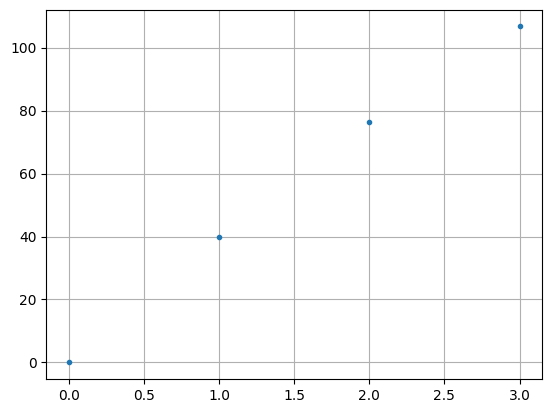

In [3]:
n_pe = (0, 1,2,3) # Lista con los valores de los fotoequivalentes
volt = (0, 39.9, 76.3, 106.7) # Lista con los voltajes de threshold para cada fotoequivalente
plt.grid()
plt.plot(n_pe, volt, '.')

Veo si puedo recuperar la curva de dark rate usando tangentes hiperbólicas, colocando los valores correspondientes de los thresholds para cada fotoequivalente y sumando las curvas de los 3 fotoequivalentes. Uso las frecuencias relativas que aparecen en la tesis de Botti para cada fotequivalente.

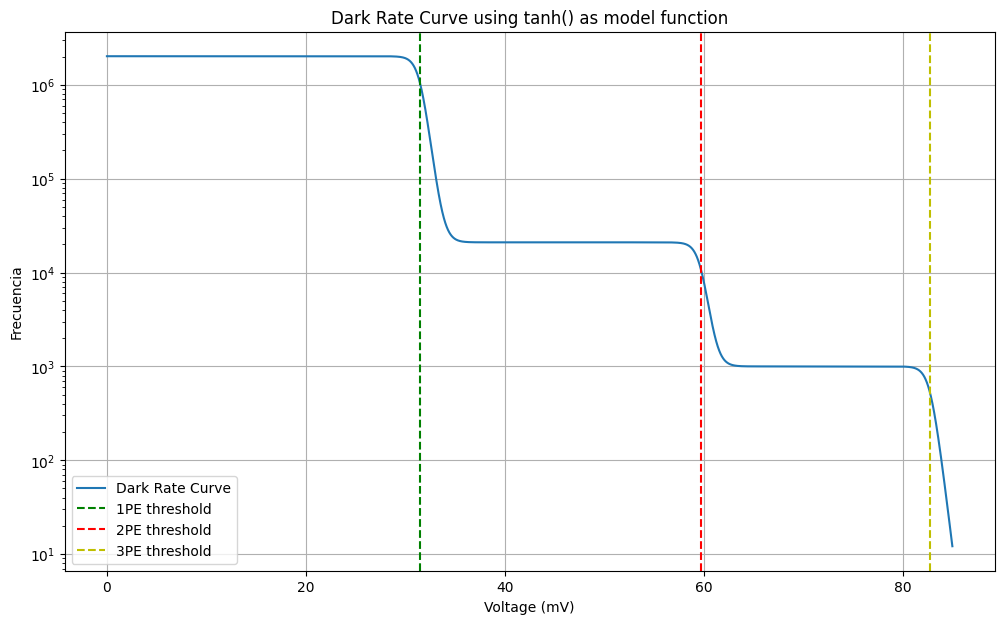

In [9]:
thr_1pe = 31.5
thr_2pe = 59.7
thr_3pe = 82.8

# Generate x values
x = np.linspace(0, 85, 10000)

# Compute tanh for each x value
y_1 = (10**6)*(-np.tanh(x-thr_1pe)+1) # Uso los valores de frecuencia relativa obtenidos de la tesis de Botti
y_2 = (10**4)*(-np.tanh(x-thr_2pe)+1)
y_3 = (5*10**2)*(-np.tanh(x-thr_3pe)+1)

y = y_1 + y_2 + y_3

# Create the plot
plt.figure(figsize=(12,7))
plt.plot(x, y, label='Dark Rate Curve')

# Add title and labels
plt.title('Dark Rate Curve using tanh() as model function')
plt.yscale('log')
plt.xlabel('Voltage (mV)')
plt.ylabel('Frecuencia')

plt.axvline(thr_1pe, color = 'g', label = '1PE threshold', linestyle = '--')
plt.axvline(thr_2pe, color = 'r', label = '2PE threshold', linestyle = '--')
plt.axvline(thr_3pe, color = 'y', label = '3PE threshold', linestyle = '--')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.savefig('dark_rate.pdf', dpi=1000)


In [4]:
# Entonces el valor del threshold que se usa en las mediciones que es de 2.5PE vale:

real_threshold = (thr_2pe + thr_3pe)/2
real_threshold

71.25

### Threshold of only preamp

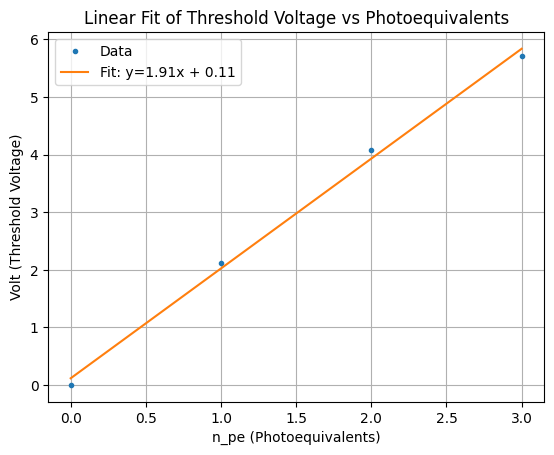

In [5]:
n_pe = np.array([0, 1, 2, 3])  # Lista con los valores de los fotoequivalentes
volt = np.array([0, 2.12, 4.07, 5.71])  # Lista con los voltajes de threshold para cada fotoequivalente

# Perform a linear fit (degree = 1)
coefficients = np.polyfit(n_pe, volt, 1)  # returns [slope, intercept]

# Generate fitted values for the line
fit_line = np.polyval(coefficients, n_pe)

# Plot the original data points
plt.grid()
plt.plot(n_pe, volt, '.', label='Data')

# Plot the linear fit
plt.plot(n_pe, fit_line, '-', label=f'Fit: y={coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Add labels and legend
plt.xlabel('n_pe (Photoequivalents)')
plt.ylabel('Volt (Threshold Voltage)')
plt.legend()
plt.title('Linear Fit of Threshold Voltage vs Photoequivalents')
plt.show()


At PE = 1.5, Voltage = 3.07 mV
At PE = 2.5, Voltage = 4.86 mV
At PE = 4.0, Voltage = 7.56 mV
At PE = 5.0, Voltage = 9.35 mV
At PE = 10.0, Voltage = 18.33 mV


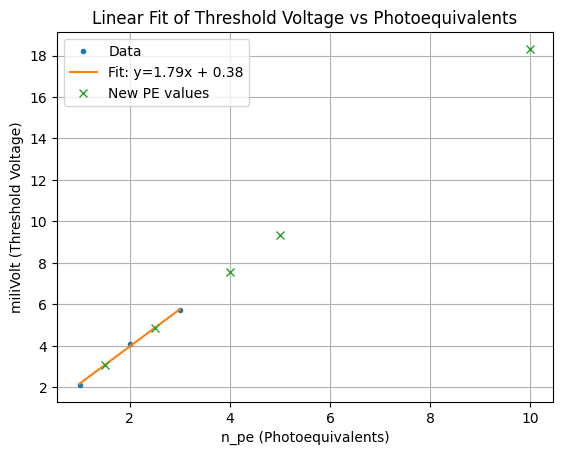

In [11]:
n_pe = np.array([1, 2, 3])  # Lista con los valores de los fotoequivalentes
volt = np.array([2.12, 4.07, 5.71])  # Lista con los voltajes de threshold para cada fotoequivalente

# Perform a linear fit (degree = 1)
coefficients = np.polyfit(n_pe, volt, 1)  # returns [slope, intercept]

# Function to get voltage at any PE value
def get_voltage(pe, coefficients):
    slope, intercept = coefficients
    return slope * pe + intercept

# Example: Calculate the voltage for different PE values
new_pe_values = np.array([1.5, 2.5, 4, 5, 10])  # New PE values to evaluate
voltages_at_new_pe = get_voltage(new_pe_values, coefficients)

# Print the results
for pe, voltage in zip(new_pe_values, voltages_at_new_pe):
    print(f"At PE = {pe}, Voltage = {voltage:.2f} mV")

# Plot the original data and the fitted line
fit_line = np.polyval(coefficients, n_pe)
plt.grid()
plt.plot(n_pe, volt, '.', label='Data')
plt.plot(n_pe, fit_line, '-', label=f'Fit: y={coefficients[0]:.2f}x + {coefficients[1]:.2f}')
plt.plot(new_pe_values, voltages_at_new_pe, 'x', label='New PE values')  # Plot the new PE points
plt.xlabel('n_pe (Photoequivalents)')
plt.ylabel('miliVolt (Threshold Voltage)')
plt.legend()
plt.title('Linear Fit of Threshold Voltage vs Photoequivalents')
plt.show()
